In [4]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

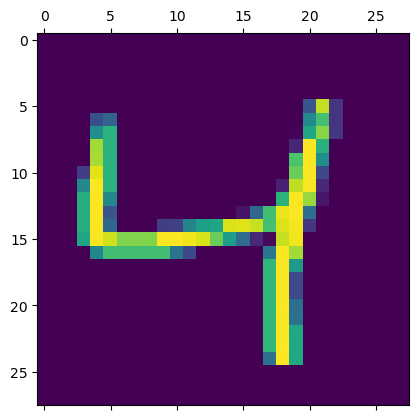

In [12]:
plt.matshow(X_train[2])

LABELS:

In [13]:
y_train[2]

4

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
X_train = X_train / 255
X_test = X_test / 255  #scaling

Flattening the arrays(reshape)

In [26]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [28]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [29]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Simple Neural Network (INPUT_Layer=784 elements,OUTPUT_Layer = 10 elements)

In [31]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
optimizer='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy']
    )
    
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4726 - accuracy: 0.8747
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9289
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9299
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.9266


[0.2643660306930542, 0.9265999794006348]

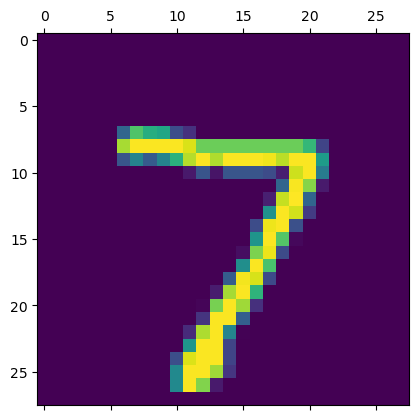

In [34]:
plt.matshow(X_test[0])

In [37]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 944us/step


In [44]:
np.argmax(y_pred[0])


7

In [46]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [50]:
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    6,    6,    2,    1,    1],
       [   0, 1116,    4,    1,    0,    1,    4,    2,    7,    0],
       [   3,    8,  942,   13,    6,    5,   10,    9,   32,    4],
       [   1,    0,   21,  910,    1,   35,    2,    9,   23,    8],
       [   1,    1,    8,    2,  902,    0,   10,    7,   12,   39],
       [   7,    3,    4,   26,    6,  798,   10,    5,   28,    5],
       [  11,    3,   10,    1,    7,   18,  904,    1,    3,    0],
       [   1,    7,   27,    6,    3,    1,    0,  942,    3,   38],
       [   5,   12,    6,   18,    9,   33,    7,    9,  866,    9],
       [   9,    8,    1,    8,   18,    6,    0,   25,    8,  926]])>

Text(95.72222222222221, 0.5, 'Truth')

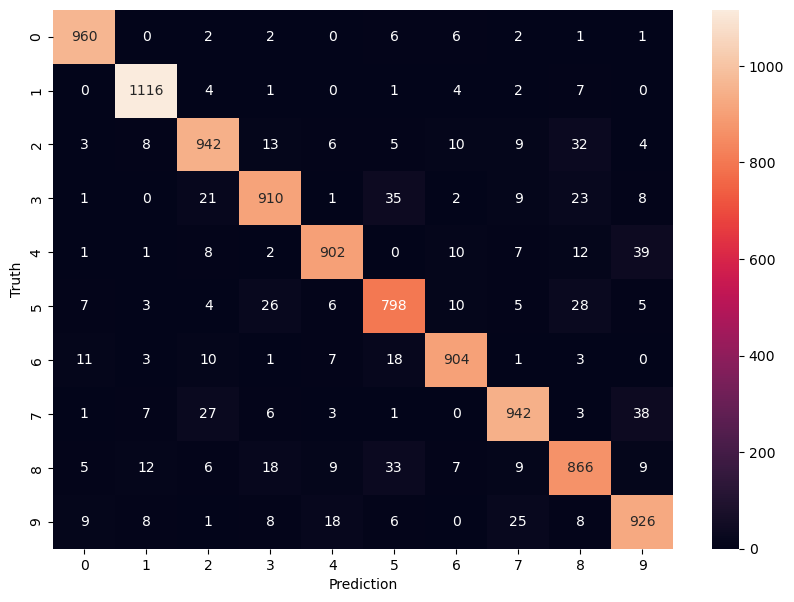

In [52]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
optimizer='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy']
    )
    
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1236 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0647 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0326 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0228 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [54]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9781


[0.08030179142951965, 0.9781000018119812]

In [55]:
y_pred = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [56]:
y_pred_labels = [np.argmax(i) for i in y_pred]


In [57]:
cm = tensorflow.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)


Text(95.72222222222221, 0.5, 'Truth')

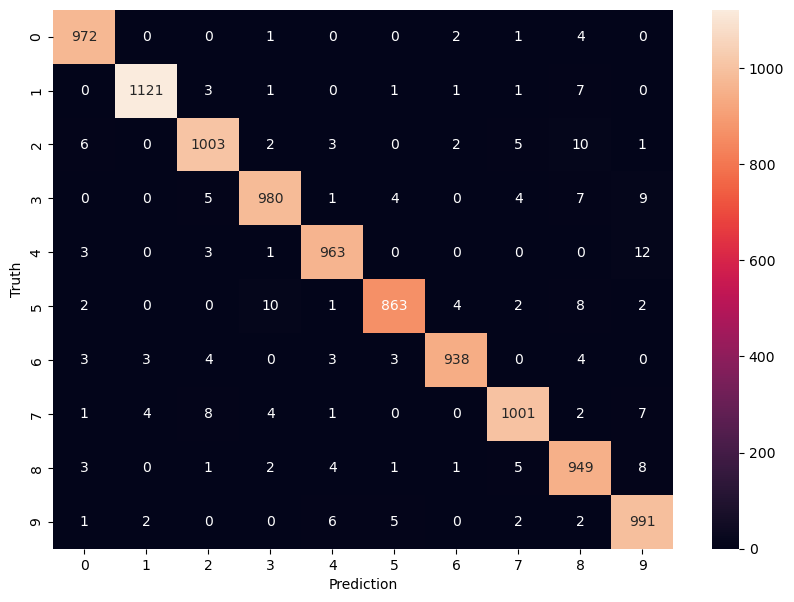

In [58]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Much better

In [62]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
optimizer='adam',
loss ='sparse_categorical_crossentropy',
metrics =['accuracy']
    )
    
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1240 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0668 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0412 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0269 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0221 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019